In [ ]:
import numpy as np
import pandas as pd
from math import log10, sqrt
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
from sewar.full_ref import uqi, psnr, rmse, ssim

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
!pip install sewar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load the dataset
train_path = '/content/drive/MyDrive/iproject_data/train/'
train_cleaned_path = '/content/drive/MyDrive/iproject_data/train_cleaned/'
test_path = '/content/drive/MyDrive/iproject_data/test/'

# store image names in list for later use
train_imgs = sorted(os.listdir(train_path))
train_cleaned_imgs = sorted(os.listdir(train_cleaned_path))
test_imgs = sorted(os.listdir(test_path))
print("Total number of images in the training set: ", len(train_imgs))
print("Total number of cleaned images found: ", len(train_cleaned_imgs))
print("Total number of samples in the test set: ", len(test_imgs))

Total number of images in the training set:  144
Total number of cleaned images found:  144
Total number of samples in the test set:  73


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def high_pass_filter(input_img):
    imfft = np.fft.fft2(input_img)

    # Apply a high pass filter to the image. 
    print(imfft.shape[0])
    for i in range(imfft.shape[0]):
        kx = i/float(imfft.shape[0])
        if kx>0.5:
            kx = kx-1

        for j in range(imfft.shape[1]):
            ky = j/float(imfft.shape[1])
            if  ky>0.5:
                ky = ky-1

    	      # Get rid of all the low frequency stuff - in this case, features whose wavelength is larger than about 20 pixels
            if  (kx*kx + ky*ky < 0.03*0.03):
    	          imfft[i,j] = 0

    newimage = 1.0*((np.fft.ifft2(imfft)).real)+1.0
    return newimage
    # newimg = 1

In [ ]:
imdata = np.asarray(Image.open(train_path+"99.png").convert('L'))/255.0
# imdata = np.reshape(Image, (420, 540, 3))
clean_img = np.asarray(Image.open(train_cleaned_path+"99.png").convert('L'))/255.0
# Fourier transform the input image
newimage = high_pass_filter(imdata)
newimage = np.minimum(newimage, 1.0)
newimage = np.maximum(newimage, 0.0)
  

420


Text(0.5, 1.0, 'filtered')

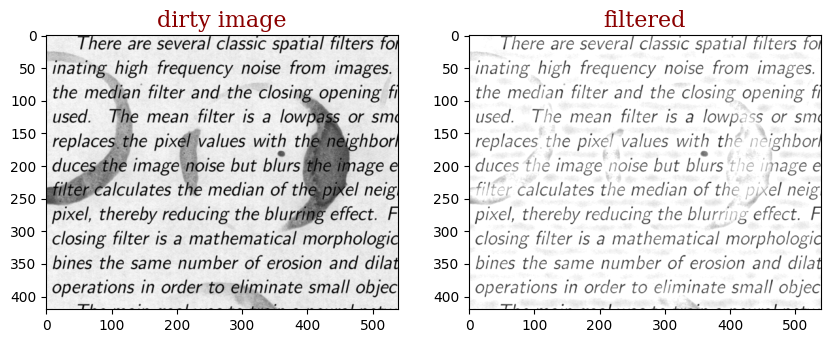

In [ ]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# plt.rcParams["axes.grid"] = False
fig=plt.figure(figsize=(10,8))
fig.add_subplot(1, 2, 1)
plt.imshow(imdata, cmap='gray')
plt.title('dirty image', fontdict=font)
# fig=plt.figure(figsize=(5,3))
fig.add_subplot(1, 2, 2)
plt.imshow(newimage, cmap='gray')
plt.title('filtered', fontdict=font)

In [ ]:
def PSNR(clean, filtered):
    mse = np.mean((clean - filtered) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [ ]:
rmse_val = rmse(clean_img, newimage) 
print(f"RMSE : {rmse_val}") 
uqi_val = uqi(clean_img, newimage)
print(f"UQI: {uqi_val}") 
psnr_val = PSNR(clean_img, newimage)
print(f"PSNR value: {psnr_val} dB")


RMSE : 0.15309630105290248
UQI: 0.974697192142666
PSNR value: 64.43150965124158 dB
